# Módulo 2: HTML: Requests y BeautifulSoup
## Parsing Pagina12

<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>
En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
p12.status_code

200

In [ ]:
# p12.content

Muchas veces la respuesta a la solicitud puede ser algo que no sea un texto: una imagen, un archivo de audio, un video, etc.

In [ ]:
# p12.text

Analicemos otros elementos de la respuesta

In [7]:
p12.headers

{'Date': 'Fri, 10 Jun 2022 11:41:04 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"60c55-HlfwdtS5xPMDa+YkKiAONzNFDx0"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'age': '87', 'grace': '86400.000 none', 'ttl': '32.514', 'x-instance': 'cache-front-prod-varnish-68cf7d4bd6-2cjhr', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '7191d5f6fe4608dd-EZE', 'Content-Encoding': 'gzip'}

In [8]:
p12.request.headers

{'User-Agent': 'python-requests/2.28.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El contenido de la request que acabamos de hacer está avisando que estamos utilizando la biblioteca requests para python y que no es un navegador convencional. Se puede modificar

In [9]:
p12.cookies

<RequestsCookieJar[]>

In [10]:
from bs4 import BeautifulSoup

In [11]:
s = BeautifulSoup(p12.text, 'lxml')

In [12]:
type(s)

bs4.BeautifulSoup

In [13]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

Primer ejercicio: obtener un listado de links a las distintas secciones del diario.<br>
Usar el inspector de elementos para ver dónde se encuentra la información.

In [17]:
secciones = s.find('div', attrs={'class':'headlines-group'})
# secciones

Estamos interesados en los links, no en el texto

In [18]:
a_tags = secciones.find_all('a')
links_secciones  = [a.get('href') for a in a_tags]
links_secciones

['https://www.pagina12.com.ar/428263-cumbre-de-las-americas-la-sorpresiva-reunion-entre-alberto-f',
 None,
 'https://www.pagina12.com.ar/428263-cumbre-de-las-americas-la-sorpresiva-reunion-entre-alberto-f',
 'https://www.pagina12.com.ar/428200-biden-y-bolsonaro-cara-a-cara-pero-con-distancia',
 'https://www.pagina12.com.ar/428149-el-duro-discurso-de-alberto-fernandez-en-la-cumbre-de-las-am',
 'https://www.pagina12.com.ar/428149-el-duro-discurso-de-alberto-fernandez-en-la-cumbre-de-las-am',
 None,
 'https://www.pagina12.com.ar/428177-la-queja-de-alberto-fernandez-por-no-incluir-a-las-islas-mal',
 'https://www.pagina12.com.ar/428177-la-queja-de-alberto-fernandez-por-no-incluir-a-las-islas-mal',
 'https://www.pagina12.com.ar/428193-el-fd-t-presento-en-el-senado-el-proyecto-de-ley-para-amplia',
 'https://www.pagina12.com.ar/428193-el-fd-t-presento-en-el-senado-el-proyecto-de-ley-para-amplia',
 'https://www.pagina12.com.ar/autores/237906-melisa-molina',
 'https://www.pagina12.com.ar/428067-

Carguemos la página de una sección para ver cómo se compone

In [19]:
sec = requests.get(links_secciones[0])

In [20]:
sec

<Response [200]>

In [21]:
sec.request.url

'https://www.pagina12.com.ar/428263-cumbre-de-las-americas-la-sorpresiva-reunion-entre-alberto-f'

In [22]:
soup_seccion = BeautifulSoup(sec.text, 'lxml')

In [23]:
print(soup_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Cumbre de las Américas: la sorpresiva reunión entre Alberto Fernández y Bolsonaro | Encuentro fuera de agenda | Página12
  </title>
  <link href="https://www.pagina12.com.ar/428263-cumbre-de-las-americas-la-sorpresiva-reunion-entre-alberto-f" rel="canonical"/>
  <link href="https://www.pagina12.com.ar/428263-cumbre-de-las-americas-la-sorpresiva-reunion-entre-alberto-f?amp=1" rel="amphtml"/>
  <script async="" src="https://news.google.com/swg/js/v1/swg.js">
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.face

La página se divide en puros `<div>` con el resto de los artículos

In [24]:
featured_article = soup_seccion.find('div', attrs={'class':'article-title'})
featured_article

<div class="article-title"><a href="https://www.pagina12.com.ar/428277-murio-julee-cruise-interprete-de-la-cancion-iconica-de-twin-">Murió Julee Cruise, intérprete de la canción icónica de Twin Peaks</a><span class="multimedia-badge"></span></div>

In [25]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/428277-murio-julee-cruise-interprete-de-la-cancion-iconica-de-twin-'

In [33]:
article_list = soup_seccion.find_all('div', attrs={'class':'article-title'})
article_list

[<div class="article-title"><a href="https://www.pagina12.com.ar/428277-murio-julee-cruise-interprete-de-la-cancion-iconica-de-twin-">Murió Julee Cruise, intérprete de la canción icónica de Twin Peaks</a><span class="multimedia-badge"></span></div>,
 <div class="article-title"><a href="https://www.pagina12.com.ar/428276-tailandia-legalizo-el-cultivo-y-consumo-de-marihuana-medicin">Tailandia legalizó el cultivo y consumo de marihuana medicinal</a><span class="multimedia-badge"></span></div>,
 <div class="article-title"><a href="https://www.pagina12.com.ar/428270-el-conflicto-rusia-ucrania-minuto-a-minuto">El conflicto Rusia - Ucrania, minuto a <span class="title-separator">minuto</span><span class="title-prefix">Día 107 de la guerra </span></a><span class="multimedia-badge"></span></div>,
 <div class="article-title"><a href="https://www.pagina12.com.ar/428269-anses-jubilados-quienes-cobran-hoy-viernes-10-de-junio">ANSES Jubilados: quiénes cobran hoy viernes 10 de <span class="title-sepa

In [34]:
notas = [x.a.get('href') for x in article_list]
notas

['https://www.pagina12.com.ar/428277-murio-julee-cruise-interprete-de-la-cancion-iconica-de-twin-',
 'https://www.pagina12.com.ar/428276-tailandia-legalizo-el-cultivo-y-consumo-de-marihuana-medicin',
 'https://www.pagina12.com.ar/428270-el-conflicto-rusia-ucrania-minuto-a-minuto',
 'https://www.pagina12.com.ar/428269-anses-jubilados-quienes-cobran-hoy-viernes-10-de-junio',
 'https://www.pagina12.com.ar/428268-dolar-blue-hoy-a-cuanto-cotiza-el-viernes-10-de-junio']

In [35]:
def obtener_notas(soup):
    '''
    Función que recibe un objeto de BeautifulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_notas = []
        
    # Obtengo el listado de artículos
    article_list = soup.find_all('div', attrs={'class':'article-title'})
    for article in article_list:
        if article.a:
            lista_notas.append(article.a.get('href'))
    
    # delete None and duplicates
    lista_notas = list(set(lista_notas))

    return lista_notas

Probemos la función

In [36]:
lista_notas = obtener_notas(soup_seccion)
lista_notas

['https://www.pagina12.com.ar/428270-el-conflicto-rusia-ucrania-minuto-a-minuto',
 'https://www.pagina12.com.ar/428276-tailandia-legalizo-el-cultivo-y-consumo-de-marihuana-medicin',
 'https://www.pagina12.com.ar/428269-anses-jubilados-quienes-cobran-hoy-viernes-10-de-junio',
 'https://www.pagina12.com.ar/428268-dolar-blue-hoy-a-cuanto-cotiza-el-viernes-10-de-junio',
 'https://www.pagina12.com.ar/428277-murio-julee-cruise-interprete-de-la-cancion-iconica-de-twin-']

In [37]:
r = requests.get(lista_notas[0])
if r.status_code == 200:
    # Procesamos la respuesta
    print('procesamos..')
else:
     # Informar el error
    print('informamos...')

procesamos..


In [38]:
url_nota = lista_notas[0]
print(url_nota)

https://www.pagina12.com.ar/428270-el-conflicto-rusia-ucrania-minuto-a-minuto


In [39]:
url_mala = url_nota.replace('2','3')
print(url_mala)

https://www.pagina13.com.ar/438370-el-conflicto-rusia-ucrania-minuto-a-minuto


In [40]:
try:
    nota = requests.get(url_mala)
except Exception as e:
    print('Error en la request:')
    print(e)
    print('\n')
    
print('El resto del programa continúa...')

Error en la request:
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: /438370-el-conflicto-rusia-ucrania-minuto-a-minuto (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002C59C54E5C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


El resto del programa continúa...


## Clase 5

In [45]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        # Extraemos el título
        titulo = s_nota.find('div', attrs={'class':'article-title'})
        print(titulo.text)
        # Extraemos la fecha
        fecha = s_nota.find('div', attrs={'class':'modification-date'}).find('time').get('datetime')
        print(fecha)
        
except Exception as e:
    print('Error en la request:')
    print(e)
    print('\n')

Murió Julee Cruise, intérprete de la canción icónica de Twin Peaks
2022-06-10T08:58:57-03:00


In [48]:
media = s_nota.find('div', attrs={'class':'article-main-media-image__container'})

In [51]:
imagen = media.find_all('img')
imagen

[<img alt=" (Fuente: AFP)" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-06/558634-000-32c77q9.jpg?itok=K3UdgngA"/>]

In [54]:
img_src = imagen[0].get('src')
print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-06/558634-000-32c77q9.jpg?itok=K3UdgngA


In [56]:
img_req = requests.get(img_src)
img_req.status_code

200

In [ ]:
img_req.content # bytes de la imagen

In [58]:
from IPython.display import Image

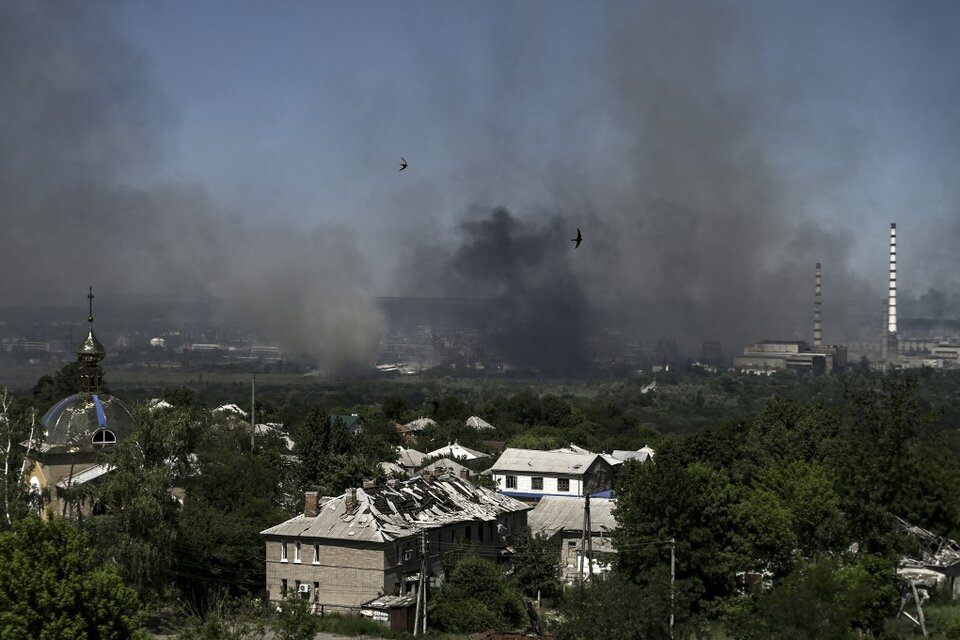

In [59]:
Image(img_req.content)